<a href="https://colab.research.google.com/github/Blaze10/DL/blob/main/ANN/Code_challange_more_qwerties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from IPython import display

plt.style.use('ggplot')
display.set_matplotlib_formats('svg')

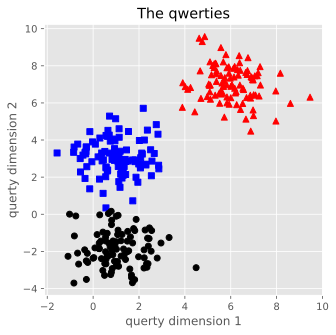

In [24]:
n_per_clust = 100
blur = 1

A = [1,3]
B = [1,-2]
C = [6,7]

# generate data
a = [A[0] + np.random.randn(n_per_clust) * blur, A[1] + np.random.randn(n_per_clust) * blur]
b = [B[0] + np.random.randn(n_per_clust) * blur, B[1] + np.random.randn(n_per_clust) * blur]
c = [C[0] + np.random.randn(n_per_clust) * blur, C[1] + np.random.randn(n_per_clust) * blur]

# true labels
labels_np = np.vstack((np.zeros((n_per_clust, 1)), np.ones((n_per_clust, 1)), np.full((n_per_clust, 1), 2)))

# concatenate into a matrix
data_np = np.hstack((a,b,c)).T

# convert data to pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.plot(data[np.where(labels==2)[0], 0], data[np.where(labels==2)[0], 1], 'r^')
plt.title('The qwerties')
plt.xlabel('querty dimension 1')
plt.ylabel('querty dimension 2')
plt.show()

In [67]:
model = nn.Sequential(
    nn.Linear(2,16),
    nn.ReLU(),
    nn.Linear(16,64),
    nn.ReLU(),
    nn.Linear(64,3),
    nn.Softmax(dim=1)
)

loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

In [59]:
data[:5]

tensor([[ 1.2326,  2.9015],
        [ 0.5104,  3.3855],
        [ 2.0167,  3.9753],
        [ 0.7166,  5.2881],
        [-0.0265,  3.8994]])

In [60]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [73]:
num_epochs = 2000
losses = torch.zeros(num_epochs)
ongoingAcc = []

for epochi in range(num_epochs):
  yHat = model(data)
  loss = loss_fun(yHat, labels)
  losses[epochi] = loss

  # back prop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # compute accuracy
  matches = torch.argmax(yHat, axis=1) == labels
  matchesNumeric = matches.float()
  accuracyPt = 100 * torch.mean(matchesNumeric)
  ongoingAcc.append(accuracyPt)

  if epochi == 999:
    print(f'Stats for epoch: {epochi + 1}')
    print(f'matches: {matches[:5]}')
    print(f'matchesNumeric: {matchesNumeric[:5]}')
    print(f'Accuracy: {accuracyPt}')

# final forward pass
predictions = model(data)
pred_labels = torch.argmax(predictions, axis=1)
total_accuracy = 100 * torch.mean((pred_labels == labels).float())
print(f'Final accuracy: {total_accuracy:.2f}')

Stats for epoch: 1000
matches: tensor([True, True, True, True, True])
matchesNumeric: tensor([1., 1., 1., 1., 1.])
Accuracy: 99.66666412353516
Final accuracy: 99.67


In [62]:
torch.argmax(yHat, axis=1)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

## Visualize the results

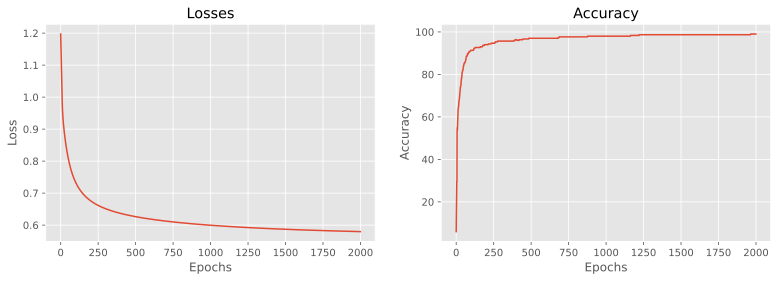

In [63]:
fig, ax = plt.subplots(1,2,figsize=(13,4))
ax[0].plot(losses.detach())
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy')
plt.show()

In [50]:
torch.sum(yHat, axis=1)[:5]

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SliceBackward0>)

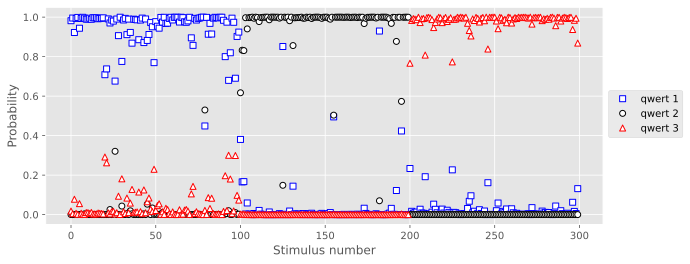

In [64]:
plt.figure(figsize=(10,4))
colorshape = ['bs', 'ko', 'r^']
for i in range(3):
  plt.plot(yHat[:,i].detach(), colorshape[i], markerfacecolor='w')

plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['qwert 1', 'qwert 2', 'qwert 3'], loc=(1.01, .4))
plt.show()